In [1]:
from analysis.data_exp1 import DataExp1
import numpy as np
import matplotlib as mpl
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

mpl.rc('font', **{'family': 'sans-serif', 'size': 20, 'weight': 'normal', 'sans-serif': ['Arial', 'LiberationSans-Regular', 'FreeSans']})

1
score by half: 122.0 / -30.0
              I            G        C_012        C_120        C_201  \
0   2286.078417  2957.326217  2613.491717  2609.662336  2598.742607   
1   2241.086952  1464.260919  2597.880521  1453.413949  1469.027516   
2   2263.674165 -6089.315466 -1948.149559 -2744.680236 -1063.077859   
3   2176.021828  2910.734984  2538.370820  2518.954309  2527.724175   
4   2155.499220  1233.571616  2492.923331  1256.613660  1293.820262   
..          ...          ...          ...          ...          ...   
95  2255.069860  1167.626586  2595.380932  1224.846381  1253.151162   
96  2231.715154  2973.508246  2581.745746  2585.183619  2587.024675   
97  2250.909268 -5988.374775 -1019.307420 -2238.610354 -2386.656609   
98  2237.574331 -3399.733924  2585.379771 -2095.381954 -2258.884890   
99  2223.398619 -3323.870562  2563.434914 -2043.306214 -2188.222830   

          H_012        H_120        H_201 ground_truth choice confidence  
0   2739.406757  2736.289464  2724.979419

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


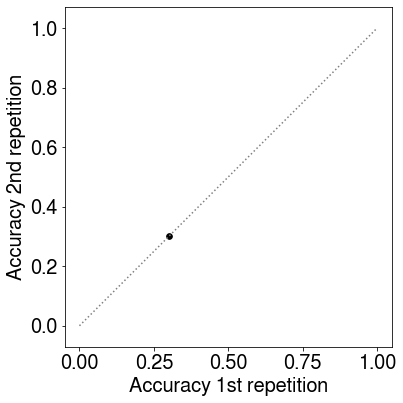

In [5]:
acc_rep1, acc_rep2 = [], []
for pid in DataExp1.pids[:1]:
    print(pid)
    data = DataExp1(pid)
    match = data.match()
    print('score by half: ', end='')
    data.idx = np.arange(0, 100)
    print(sum(data.score()), end=' / ')
    data.idx = np.arange(100, 200)
    print(sum(data.score()))
    print(data.apply_kalman_filters())
    print('score by reps: ', end='')
    data.idx = match[:, 0]
    print(sum(data.score()), end=' / ')
    data.idx = match[:, 1]
    print(sum(data.score()))
    print('accuracy by half: ', end='')
    data.idx = np.arange(0, 100)
    print(sum(data.score() > 0) / 100, end=' / ')
    data.idx = np.arange(100, 200)
    print(sum(data.score() > 0) / 100)
    print('accuracy by reps: ', end='')
    data.idx = match[:, 0]
    acc_rep1.append(sum(data.score() > 0) / 100)
    print(sum(data.score() > 0) / 100, end=' / ')
    data.idx = match[:, 1]
    acc_rep2.append(sum(data.score() > 0) / 100)
    print(sum(data.score() > 0) / 100)

x, y = acc_rep1, acc_rep2
print(ttest_rel(x, y))

_, ax = plt.subplots(figsize=(6,6))
plt.scatter(x, y, color='k', s=32)
xy_min, xy_max = 0, 1
plt.plot([xy_min, xy_max], [xy_min, xy_max], ':', color='gray')
ax.set_xlim((xy_min, xy_max))
ax.set_ylim((xy_min, xy_max))
ax.set_xlabel('Accuracy 1st repetition')
ax.set_ylabel('Accuracy 2nd repetition')
ax.axis('equal')
plt.tight_layout()
plt.show()
# plt.savefig('../pub/eLife/figs/accuracy_by_repetition.pdf', transparent=True)

In [ ]:
conf_rep1, conf_rep2 = [], []
for pid in DataExp1.pids:
    data = DataExp1(pid)
    match = data.match()
    print('confidence by reps: ', end='')
    conf_rep1.append(sum(data.df['confidence'][match[:, 0]] == 'high') / 100)
    print(conf_rep1[-1], end=' / ')
    data.idx = match[:, 1]
    conf_rep2.append(sum(data.df['confidence'][match[:, 1]] == 'high') / 100)

x, y = conf_rep1, conf_rep2
from scipy.stats import ttest_rel
print(ttest_rel(x, y))
_, ax = plt.subplots(figsize=(6,6))
plt.scatter(x, y, color='k', s=32)
xy_min, xy_max = 0, 1
plt.plot([xy_min, xy_max], [xy_min, xy_max], ':', color='gray')
ax.set_xlim((xy_min, xy_max))
ax.set_ylim((xy_min, xy_max))
ax.set_xlabel('Avg. confidence 1st repetition')
ax.set_ylabel('Avg. confidence 2nd repetition')
ax.axis('equal')
plt.tight_layout()
plt.show()
# plt.savefig('../pub/eLife/figs/confidence_by_repetition.pdf', transparent=True)